## Seabborn:
### Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [47]:
# Import seaborn
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
# Apply the default theme
#sns.set_theme()

### Figre level vs Axis level functions
Figure level : .....

Axis level: ......

ToDO as Artifact: Draw a tale of plots having columns : 
1. Plot-Name
2. Plot Style ( figure, axis etc)
3. When to use
4. pre-requisites
5. Sample image

### Relational and Statistical Plots
#### Scatter Plot: 
Draw a scatter plot with possibility of several semantic groupings.
The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets.

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

In [48]:
#sns.get_dataset_names()
plt.style.use('fivethirtyeight')
tips_data = sns.load_dataset('tips')
tips_data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
168,10.59,1.61,Female,Yes,Sat,Dinner,2
122,14.26,2.50,Male,No,Thur,Lunch,2
112,38.07,4.00,Male,No,Sun,Dinner,3
218,7.74,1.44,Male,Yes,Sat,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2


##### Draw a Scatter Plot with total_bill and tip

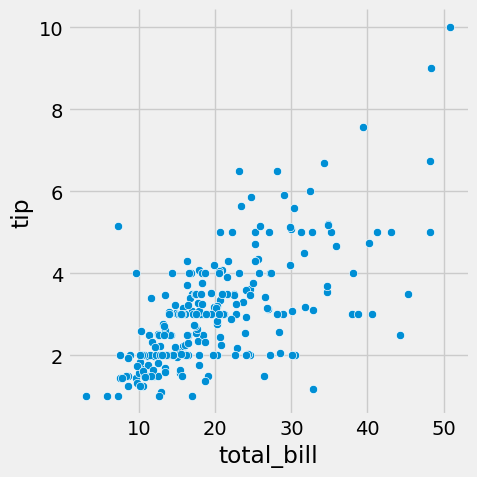

In [49]:
sns.relplot( data=tips_data, x="total_bill", y="tip", kind="scatter")
plt.show()

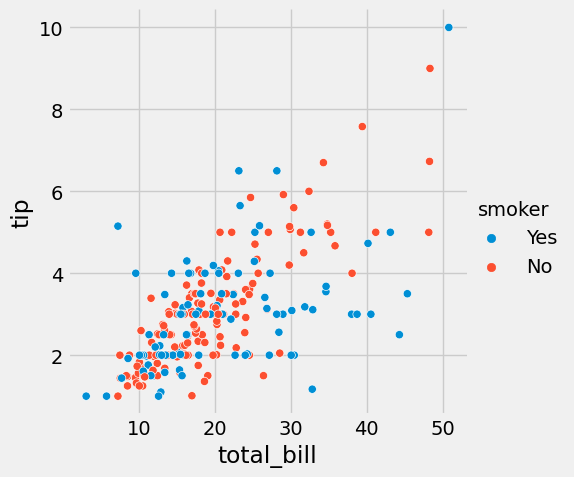

In [50]:
sns.relplot( data=tips_data, x="total_bill", y="tip", hue='smoker')
plt.show()

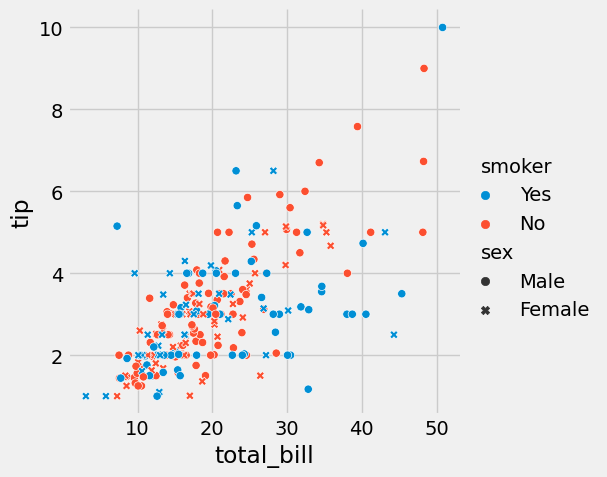

In [51]:
sns.relplot( data=tips_data, x="total_bill", y="tip", hue='smoker', style='sex')
plt.show()

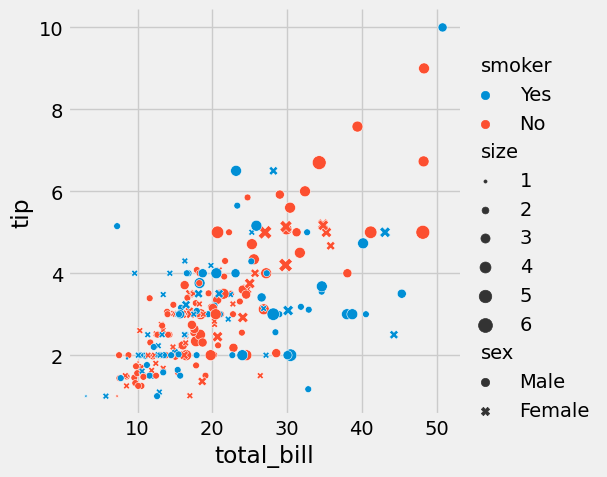

In [52]:
#sns.relplot( data=data, x="total_bill", y="tip", hue='smoker', style='sex', size='size')
sns.relplot( data=tips_data, x="total_bill", y="tip", hue='smoker', style='sex', size='size', sizes=(5,100))
plt.show()

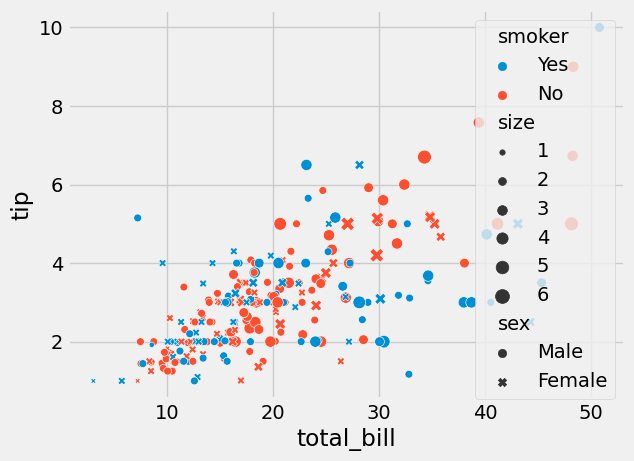

In [53]:
sns.scatterplot( data=tips_data, x="total_bill", y="tip", hue='smoker', style='sex', size='size', sizes=(15,100))
plt.show()

### Plotting Categorical Data
####  Catplot (Figure level function): 
Categorical Scatter Plot -

    x-Axis : categorical data
    y-axis : numerical data 


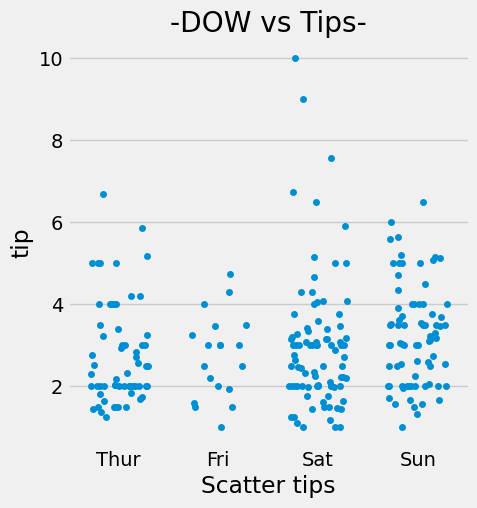

In [54]:
# strip plot
# X-Asix: Categorical data
# Y-Axis: Numerical data
# Notice: strip plot introduces some noise to segregate visuals of different points within a category 
# (its called jitter algorithm) 
#plt.style.use('fivethirtyeight')
sns.catplot(data=tips_data, x='day', y='tip', kind='strip', jitter=0.3)
#  Categories are created ased on the x axis value. As passed in parameter 'x'
plt.xlabel("Day of the Week")
plt.xlabel("Scatter tips")
plt.title("-DOW vs Tips-")
plt.show()

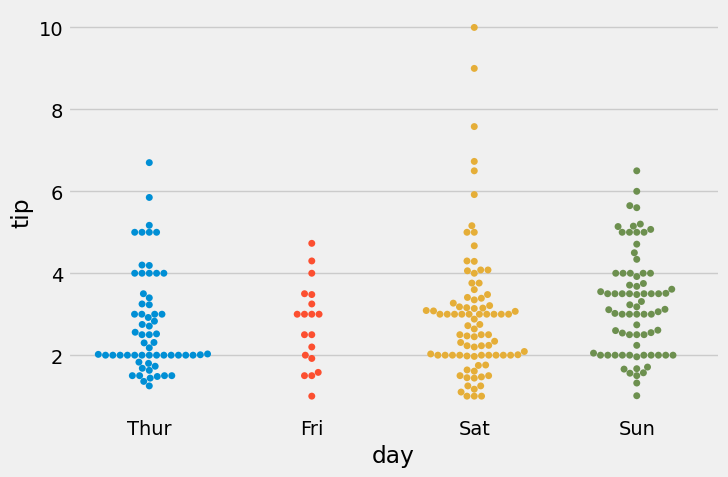

In [55]:
# swarm plot
# X-Asix: Categorical data, Y-Axis: Numerical data
# Notice: swarm plot shows distribution/density on x-axis as well. 
# (its called jitter algorithm) 

sns.catplot(data=tips_data, x='day', y='tip', kind='swarm', hue='day', height=5, aspect=1.5)
plt.show()

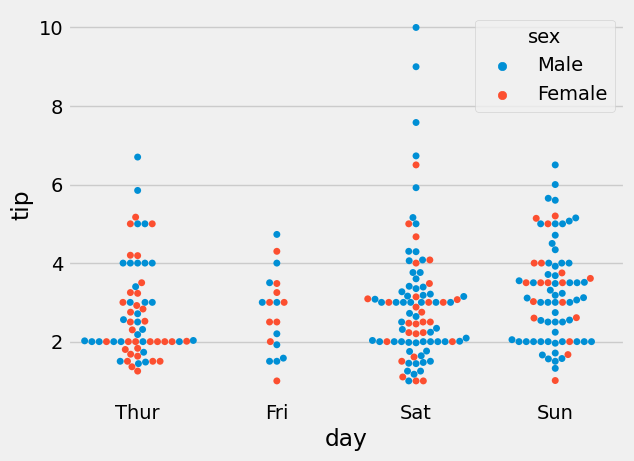

In [56]:
#sns.catplot(data=tips, x='day', y='tip', kind='swarm', hue='sex', size=3)
sns.swarmplot(data=tips_data, x='day', y='tip', hue='sex')
plt.show()

### Boxplot : 
5 point summary plot


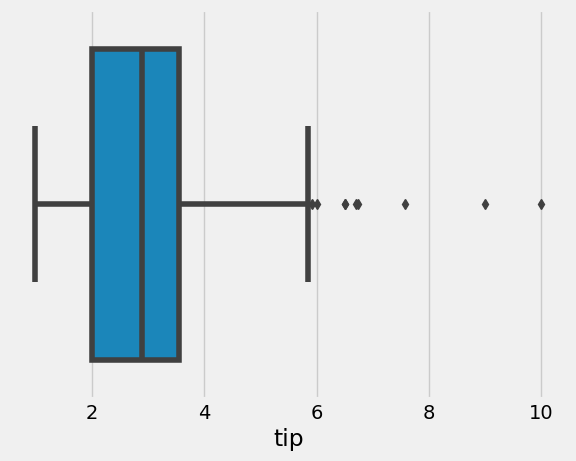

In [57]:
# Univariate numerical variable
sns.boxplot(x=tips_data['tip'])
plt.show()

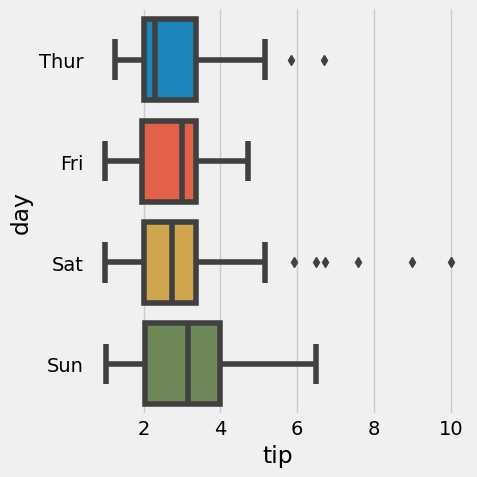

In [58]:
sns.catplot(x='tip', y='day', data=tips_data, kind='box')
plt.show()

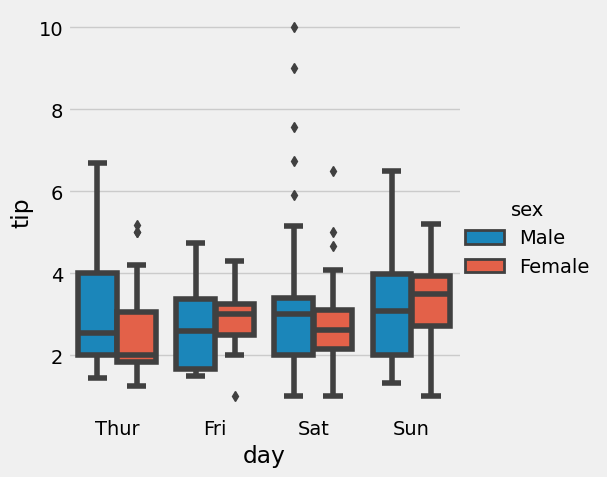

In [59]:
sns.catplot(x='day', y='tip', hue='sex', data=tips_data, kind='box')
plt.show()

### Violin Plot
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

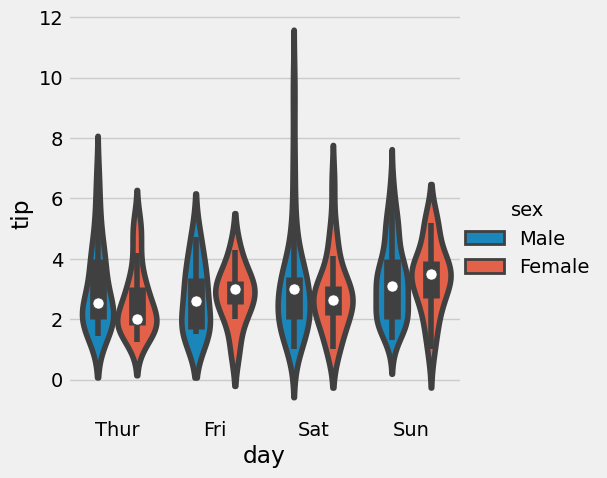

In [60]:
sns.catplot(x='day', y='tip', hue='sex', data=tips_data, kind='violin')
plt.show()

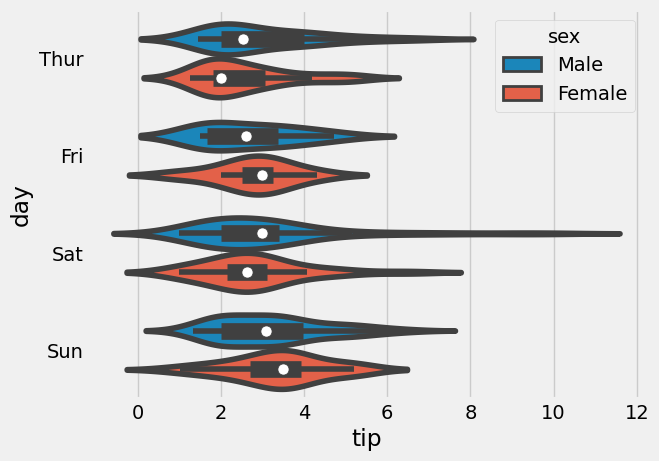

In [61]:
# draw categories on single day
sns.violinplot(x='tip', y='day', hue='sex', data=tips_data)
plt.show()

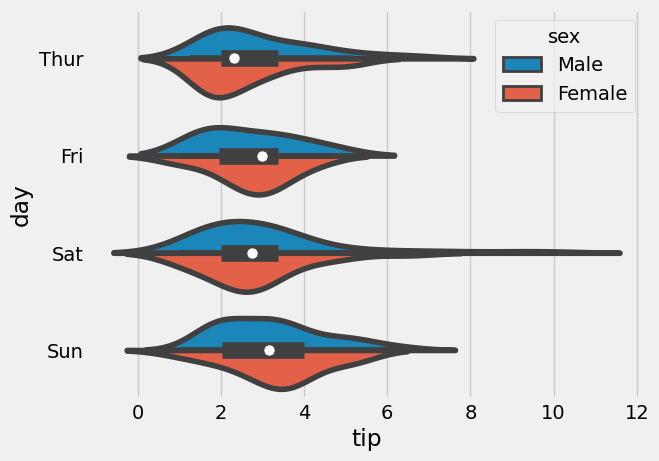

In [62]:
# Remove duplicacy to keep things clean in limited space
# This will show kde for oth hues values, however
# internal boxplot will be cummulative of both of the day the these 
sns.violinplot(x='tip', y='day', hue='sex', data=tips_data, split=True)
plt.show()

### Bar-Plot and Count-Plot


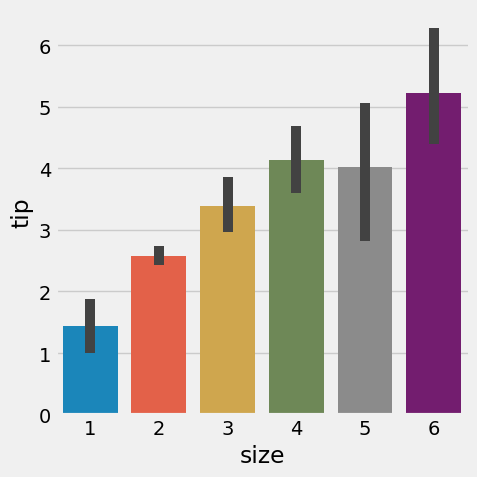

In [63]:
# Bar graph is drawn to plot average numerical values vs Categorical values
# Average tip by size of the group. Default behaviour of ar is to calculate mean of the numerical value

# Does it mean category is aleways on x axis? Not working correctly if I flip size and tip.
# the black-thick line above ar is showing confidence interval of the mean estimation
sns.catplot( x='size', y='tip', data=tips_data, kind='bar')
plt.show()

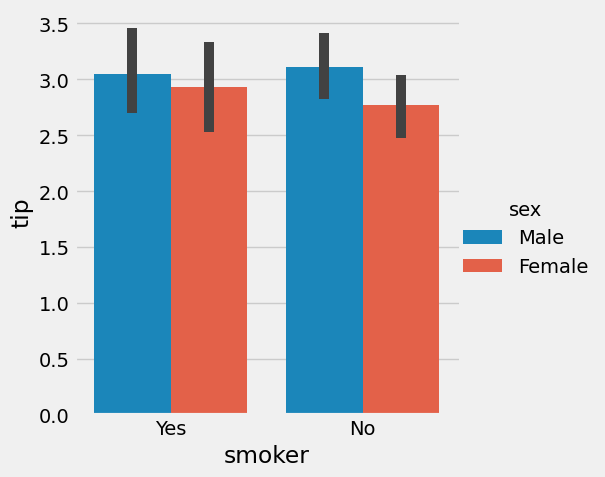

In [64]:
sns.catplot( x='smoker', y='tip', data=tips_data, kind='bar', hue='sex')
plt.show()

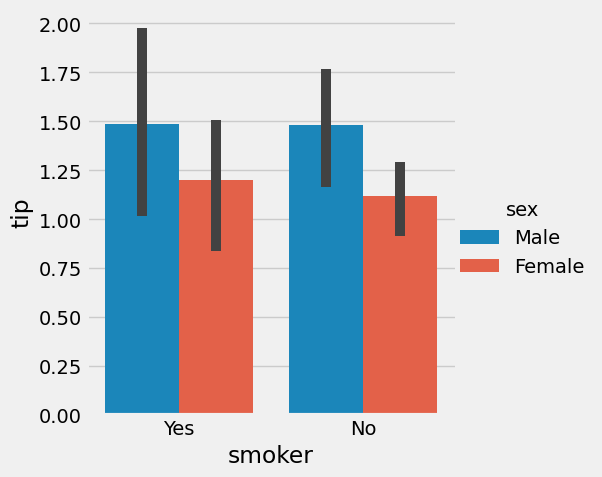

In [65]:
# By default, bar calculates mean of numerical array ut we can pass customized function pointer
# Notice parameter 'estimator' being used
sns.catplot( x='smoker', y='tip', data=tips_data, kind='bar', hue='sex', estimator=np.std)
plt.show()

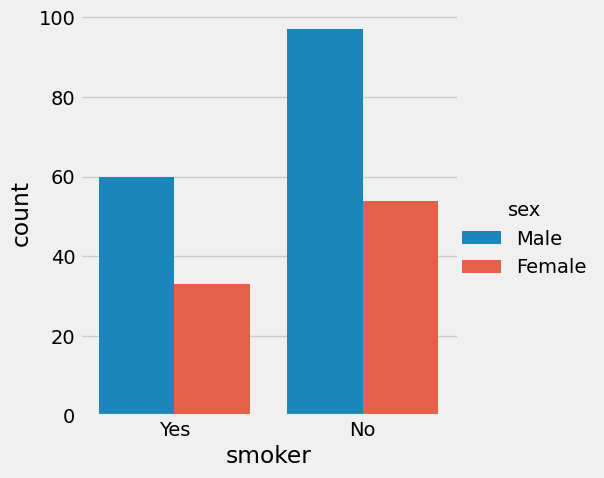

In [66]:
# Count plot is a case where categorical values and their counts 
# are displyed rather than numerical values (applied with a function on it by estimator)
sns.catplot( x='smoker', data=tips_data, kind='count', hue='sex')
plt.show()

### Heatmap
#### A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. Plot rectangular data as a color-encoded matrix.

In [67]:
flights = sns.load_dataset('flights')
flights.sample(5)

,year,month,passengers
7,1949,Aug,148
28,1951,May,172
65,1954,Jun,264
47,1952,Dec,194
111,1958,Apr,348


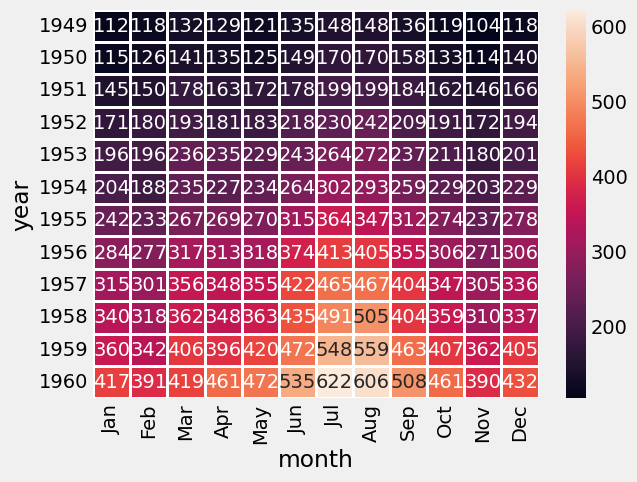

In [68]:
# plot heatmap
# x: month, y: year, values: counts of passengers
x = pd.pivot_table(index='year', columns='month', values='passengers', data=flights)
# print(x)
# font = {'family' : 'fantasy',
#         'weight' : 'bold',
#         'size'   : 10}
# plt.rc('font', **font)

sns.heatmap(data=x,linewidths=1, cbar=True, annot=True, fmt='d')
plt.show()

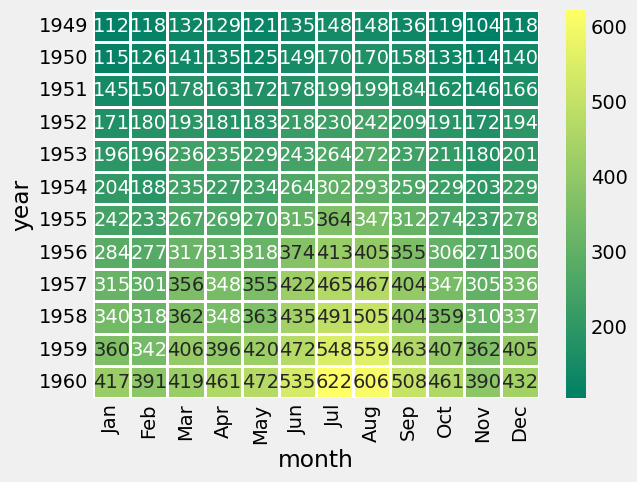

In [69]:
sns.heatmap(data=x,linewidths=1, cbar=True, annot=True, fmt='d', cmap='summer')
plt.show()

### Cluster map
#### Plot a matrix dataset as a hierarchically-clustered heatmap.
Datacells are arranged according to the similarity criteria.
It is like heatmap having similarity criteria for order and placement of a cell.

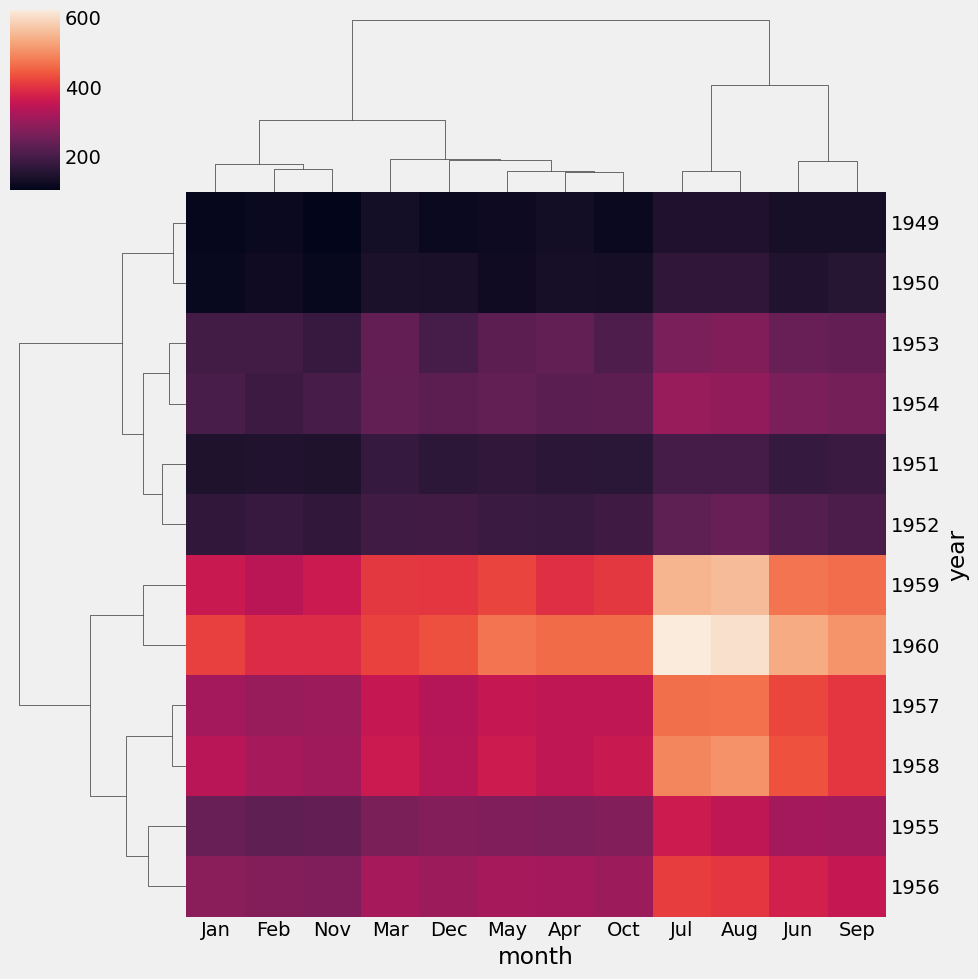

In [70]:
# Importing the library
import seaborn as sns

# Clustering data row-wise and changing color of the map.
sns.clustermap(x)
plt.show()


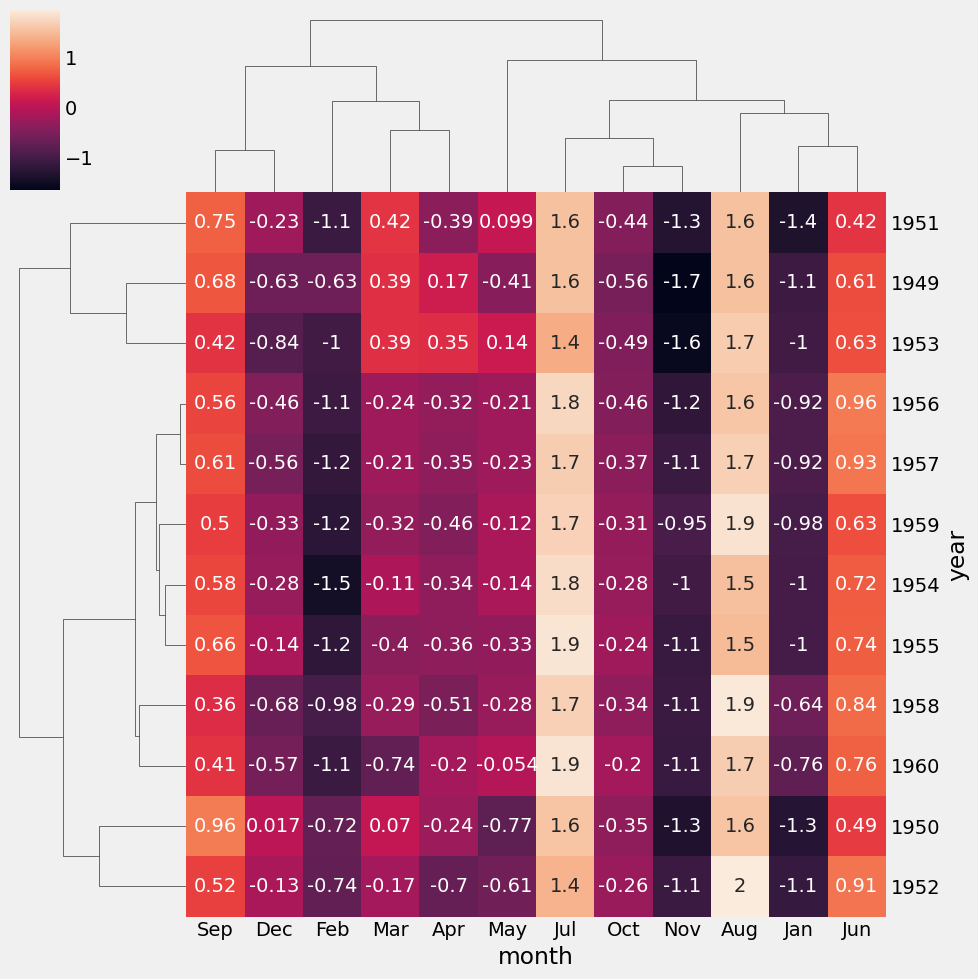

In [71]:
# changing the proximity/similarity criteria to correlation
# z_score : standardizes the values between a range
sns.clustermap(x, metric='correlation',annot=True, z_score=0)
plt.show()

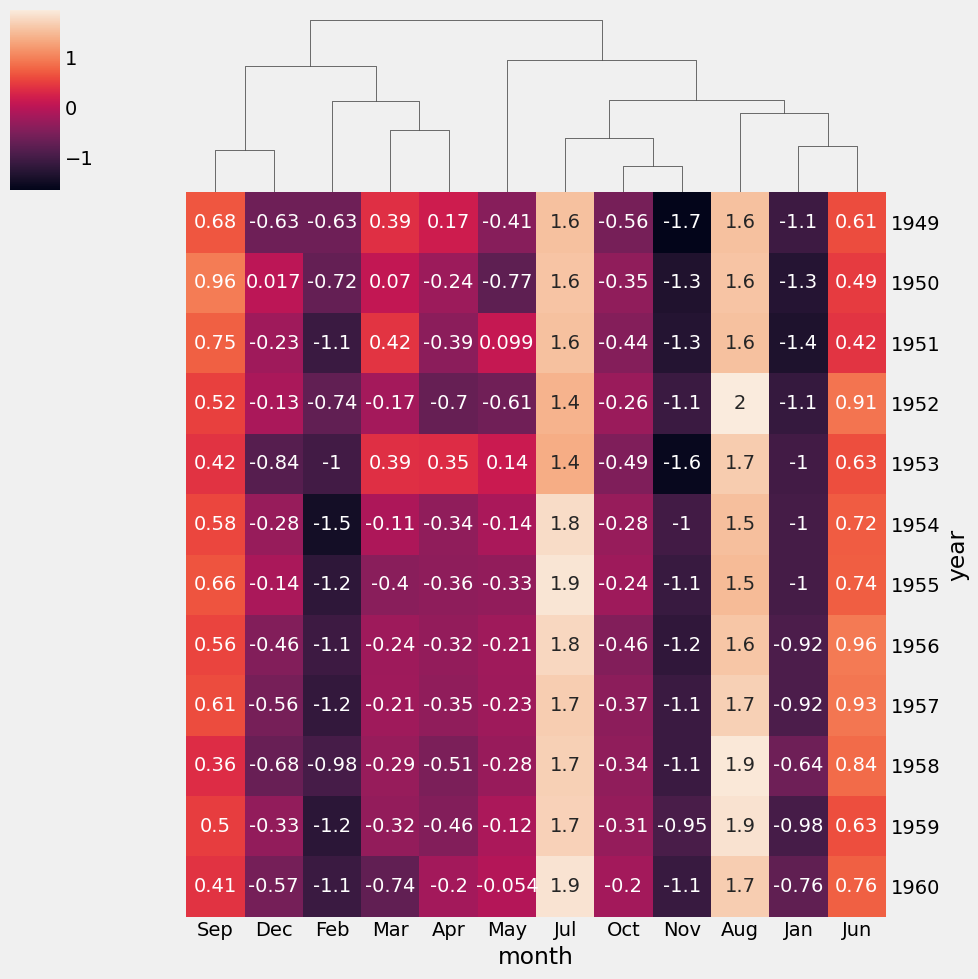

In [72]:
# clustering only on the basis of columns
sns.clustermap(x, metric='correlation',annot=True, z_score=0, row_cluster=False)
plt.show()

### Joint Plot
Draw a plot of two variables with bivariate and univariate graphs.
A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X)
1. Scatter-Plot  
2. Kde-Plot  
3. Hexbin-Plot 
4. Reg-Plot

In [73]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


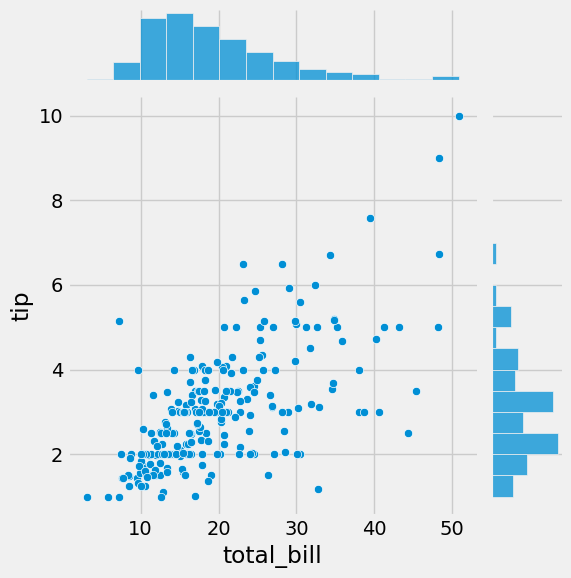

In [74]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='scatter')
plt.show()

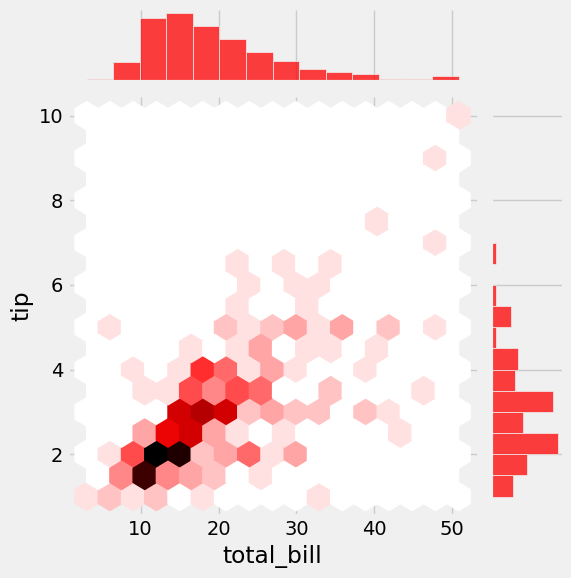

In [75]:
# in case of hexin, darker colors of hexagon represent higher frequecy of datapoints
sns.jointplot(x='total_bill', y='tip', data=data, kind='hex', color='r')
plt.show()

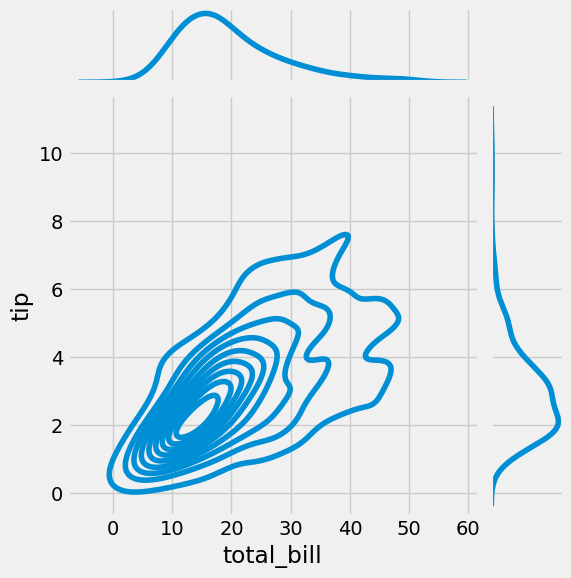

In [76]:
# jointplot of kind 'kde' draws kde as well as contour plot.

sns.jointplot(x='total_bill', y='tip', data=data, kind='kde')
plt.show()

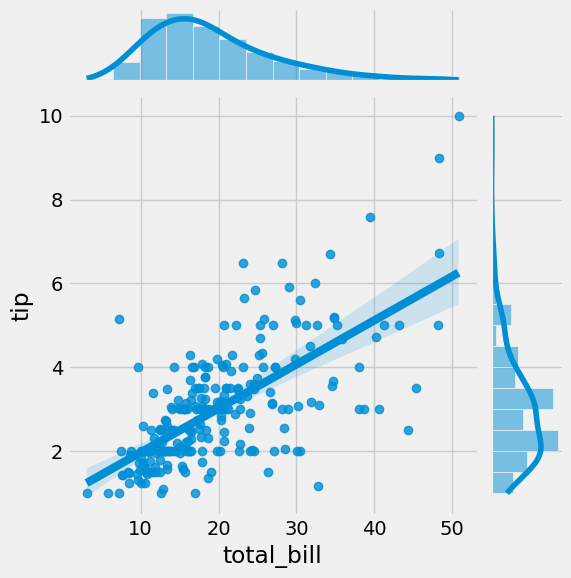

In [77]:
# Regression kind of jointplot. it includes kde, histogram, scatter and the line of regression
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg')
plt.show()

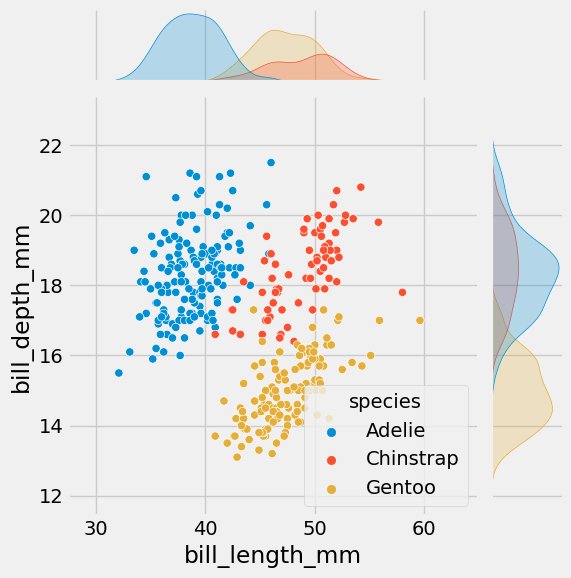

In [78]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind='scatter')
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind='kde')
plt.show()

### PairPlot
Plot pairwise relationships in a dataset vaiales.
This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. Frequently used in EDA. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


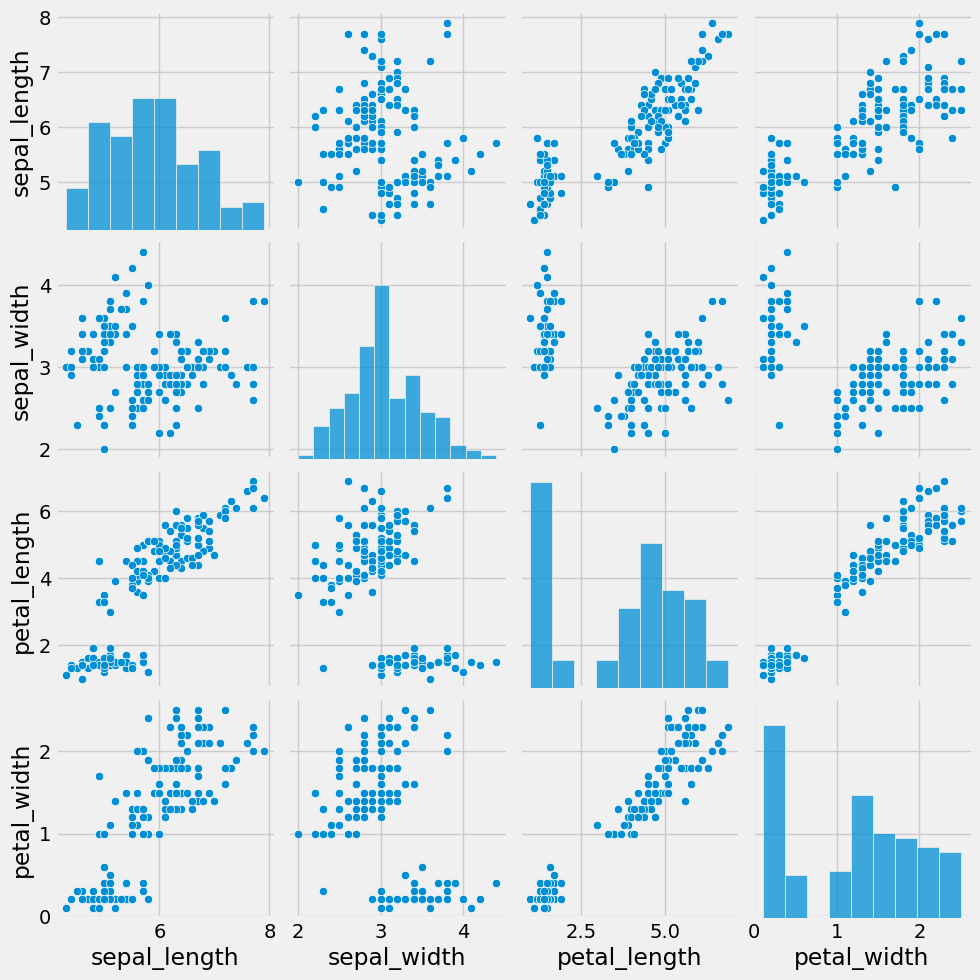

In [79]:
iris = sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris)
plt.show()

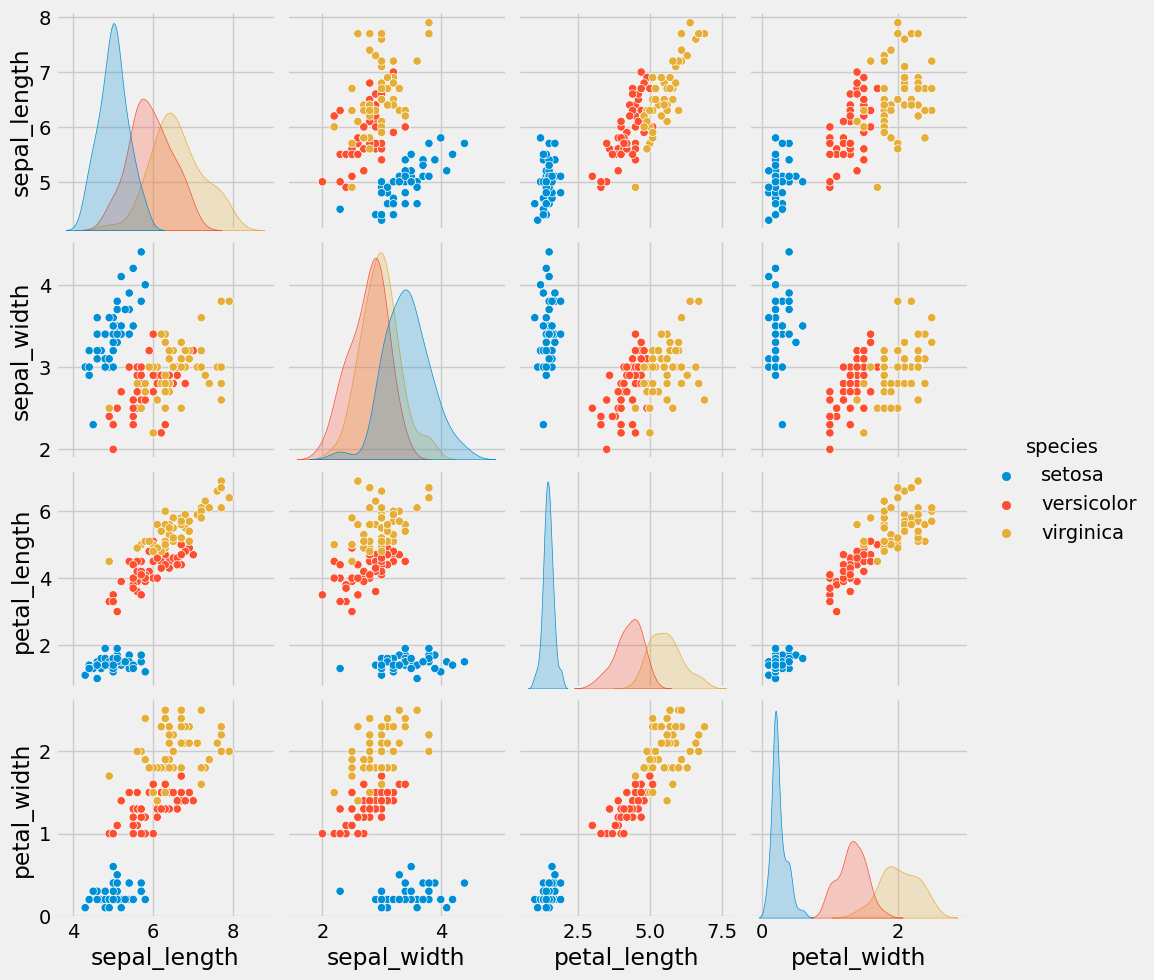

In [80]:
sns.pairplot(data=iris, hue='species')
plt.show()

### Distplot
A distribution plot, shows variations in the data distribution. Seaborn function represents the
distribution of continuous data variable.

The Seaborn module has multiple variation of Distplot-
1. Histogram 
2. KDE (Kernel Density Function)
3. RugPlot


In [81]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


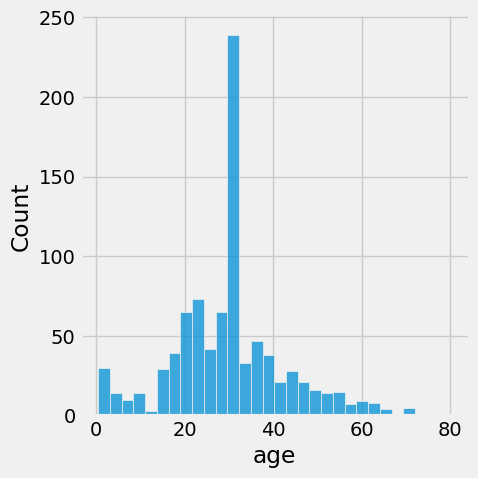

In [82]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
#titanic.info()
# draw just the histogram
sns.displot(titanic['age'])
plt.show()


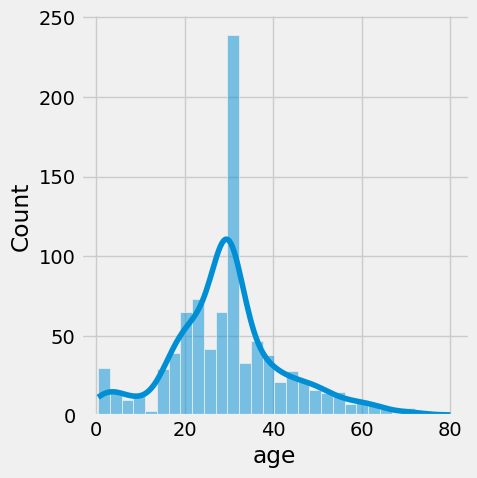

In [83]:
# draw with kde
sns.displot(titanic['age'], kde=True)
plt.show()

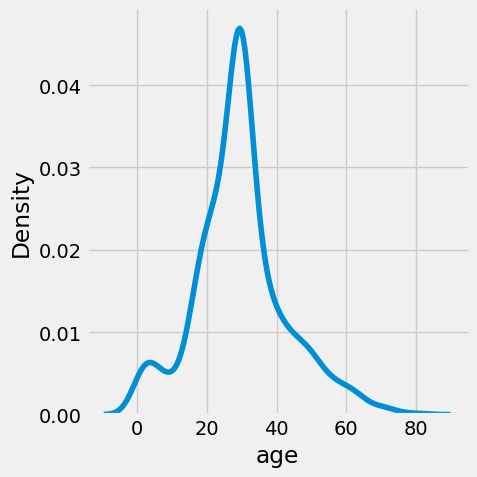

In [84]:
# draw just the kde
sns.displot(titanic['age'], kind='kde')
plt.show()

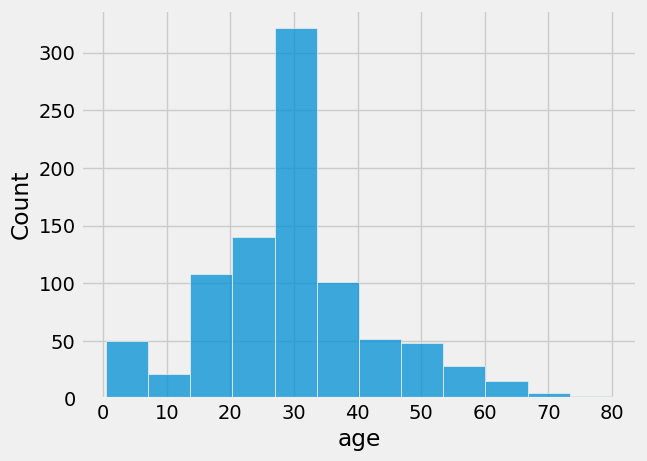

In [85]:
# draw histogram with specified bin number
sns.histplot(titanic['age'], bins=12)
plt.show()

#### ecdf plot
An empirical distribution function (commonly also called an empirical Cumulative Distribution Function, eCDF) is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points.

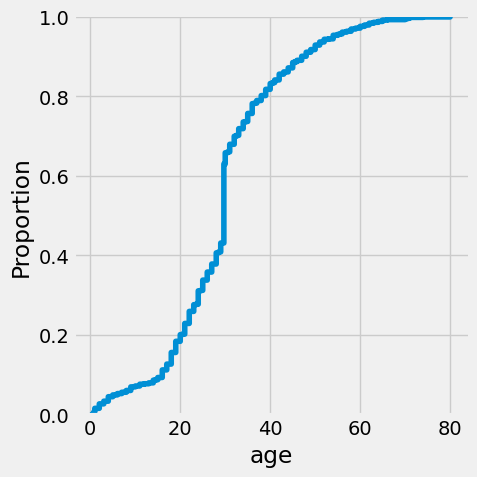

In [86]:
# draw ecumulatied kernel density functionn
sns.displot(titanic['age'], kind='ecdf')
plt.show()

#### Rug Plot
It's a plot for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. 

While plotiing it, a small vertical line is drawn for every data point. Higher density shows with more condensed line whereas sparse data shows saparse lines. It helps seeing the distribution of lines even within a proable bin. Thr flipside is that for points overlapping on the axis show only single rug line hence that counnt misses from obeservations. Hence this can e used in combinations of other plots. 

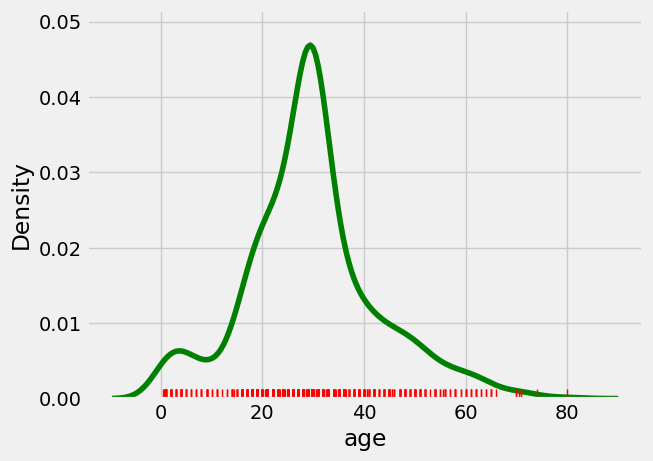

In [87]:
# drawing rug plot
#sns.histplot(titanic['age'])
sns.kdeplot(titanic['age'], color='g')
sns.rugplot(titanic['age'], color='r')
plt.show()

### Case of displot kde comparison

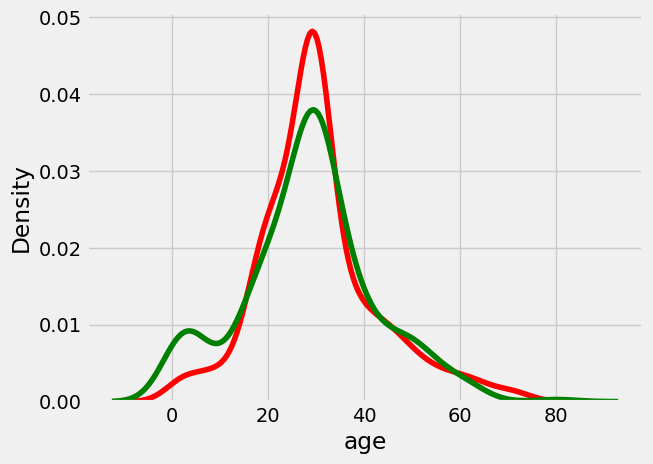

In [88]:
# Comparing survival chances with the age. 
sns.kdeplot(titanic[titanic['survived']==0]['age'], color='r')
sns.kdeplot(titanic[titanic['survived']==1]['age'], color='g')
plt.show()